# Inversion of Gordon Gulch dataset
- Processing of baseline + survey
- Extracting reciprocal model
- Time lapse inversion

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import matplotlib.dates as mdates
from os.path import isfile, join, exists

sys.path.append((os.path.relpath('C:/Users/Marc/OneDrive - Colorado School of Mines/Documents/3-Codes/4-ERT/resipy/src/')))
from resipy import Project #to install: pip install resipy

# Recip model -
# -1 = error model fit is done on all surveys independantly
# -2 = error model fit is done on the combined survey

erm = -1
if erm == -2:
    fadd = '_CombinedRecipModel'
else:
    fadd = '_IndepRecipModel'

> ResIPy parameters

In [19]:
# Mesh & Inversion parameters
# =============================================================================

#Mesh parameters
mgeom={}         #define geometries?
msurf=None       #didn't find what this means > maybe to define geometries
mcl= 0.5         #cell size between in function of electrode distance - from fine 0.0875 to coarse 0.875
mcl_factor= 6    #cell size increase with depth - from 1 to 10
mrefine= 0       #refine cell size - 0 = False; 1 = True
mfmd=None        #fine/coarse boundary depth (in m)

#ResIPy inversion parameters
iErr = True     #Does inversion take error into account? True/False
ipar = True    #Does inversion run on parallel? True/False
iDOI = False    #Does inversion estimate DOI? True/False

#R2 inversion parameters
iDataType = 1   #0 for true data based inversion or 1 for log data based.
iInvType = 2    #0 for pseudo-Marquardt solution / 1 for regularised solution with linear filter / 2 for regularised tpe with quadratic filter / 3 for qualitative solution / 4 for blocked linear regularised type.
iMaxIter = 10   #maximum iteration
iTarget = 0.0   #real number which allows the user to specify the relative reduction of mistfit in each iteration. A value of 0.25 will mean that R2 will aim to drop the misfit by 25% (and no more) of the value at the start of the iteration.
                #This allows a slower progression of the inversion, which can often result in a better convergence. If you set target_decrease to 0.0 then R2 will try to achieve the maximum reduction in misfit in the iteration.

iResMatrix = 1  #1 = sensibility matrix calculated (faster); 2 = true resolution matrix (longer); (3) sensitivity map with a jacobian matrix and roughness matrix as output.
                #0 for no sensitivity matrix estimation. High values indicate high sensitivity, low values indicate poor sensitivity. Plot on a log scale.

iRegMod = 2    #0 for normal regularisation; or 1 if you want to include regularisation relative to your starting resistivity (see mesh resisitivity values); or 2 if you wish to regularise relatdive to a previous dataset using the “Difference inversion” of LaBrecque and Yang (2001).
iErrMod = 2    #0 if you wish to preserve the data weights, 2 if you wish the inversion to update the weights as the inversion progresses based on how good a fit each data point makes.
iAaniso = 1    #alpha_aniso is the anisotropy of the smoothing factor, set alpha_aniso > 1 for smoother horizontal models, alpha_aniso < 1 for smoother vertical models, or alpha_aniso=1 for normal (isotropic) regularisation.


> Import data & Create mesh + topography

Working directory is: C:\Users\Marc\OneDrive - Colorado School of Mines\Documents\4-Colorado\2-GordonGulch\0-Data\24_ERdata\24-LineA
clearing dirname
3/3 imported
Creating triangular mesh...done (5986 elements)


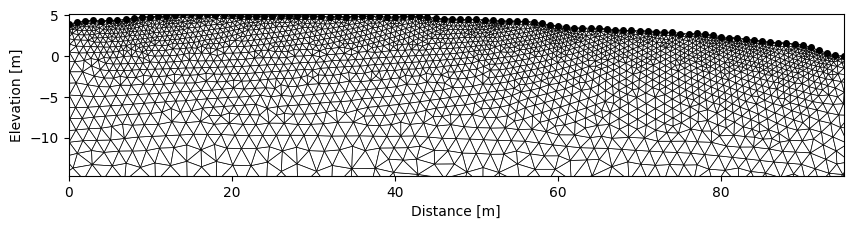

In [20]:
Line = 'A'
folder = os.path.join('C:/Users/Marc/OneDrive - Colorado School of Mines/Documents/4-Colorado/2-GordonGulch/0-Data/24_ERdata/24-Line' 
                      + Line + '/')

k = Project(typ='R2', dirname = folder)
k.createTimeLapseSurvey(folder + 'Data/', ftype="ProtocolDC")
k.importElec(os.path.join(folder + 'line' + Line + '.csv'))
k.createMesh(typ='trian', geom_input= mgeom, surface= msurf, cl= mcl, 
               cl_factor= mcl_factor, refine= mrefine, fmd= mfmd)

fig, ax = plt.subplots(figsize=(10, 5))
k.showMesh(ax=ax)
sfile = np.str_(folder + '0-mesh.png')
plt.savefig(sfile, dpi=200)

> Inversion parameters

In [21]:
k.param['lineTitle'] = 'ER TL inversion'  #Project name
k.param['job_type'] = 1                   #0 forward only - 1 Inverse problem
k.param['flux_type'] = 3                  #2 = 2D current flows / 3 = 3D current flows
k.param['Lowry et al., 1989'] = 0         #0/1 to define if you want to use singularity removal from Lowry et a., 1989.
k.param['res_matrix'] = iResMatrix        #1 = sensibility matrix calculated (faster); 2 = true resolution matrix (longer); (3) sensitivity map with a jacobian matrix and roughness matrix as outpu; 0 for no sensitivity matrix estimation.
                                          #High values indicate high sensitivity, low values indicate poor sensitivity. Plot on a log scale.
k.param['inverse_type'] = iInvType        #0 for pseudo-Marquardt solution / 1 for regularised solution with linear filter / 2 for regularised tpe with quadratic filter / 3 for qualitative solution / 4 for blocked linear regularised type.
k.param['target_decrease'] = iTarget      #real number which allows the user to specify the relative reduction of mistfit in each iteration. A value of 0.25 will mean that R2 will aim to drop the misfit by 25% (and no more) of the value at the start of the iteration.
                                          #This allows a slower progression of the inversion, which can often result in a better convergence. If you set target_decrease to 0.0 then R2 will try to achieve the maximum reduction in misfit in the iteration.
k.param['data_type'] = iDataType          #0 for true data based inversion or 1 for log data based.
k.param['reg_mode'] = iRegMod             #0 for normal regularisation; or 1 if you want to include regularisation relative to your starting resistivity (see mesh resisitivity values); or 2 if you wish to regularise relative to a previous dataset using the “Difference inversion” of LaBrecque and Yang (2001).
k.param['max_iter'] = iMaxIter            #maximum iteration
k.param['error_mod'] = iErrMod            #0 if you wish to preserve the data weights, 2 if you wish the inversion to update the weights as the inversion progresses based on how good a fit each data point makes.

> Fit & plot error model

> Inversion

Doing error modelling...
Creating mesh without ANY topography...

Creating triangular mesh...done (5199 elements)
Making temporary error modelling directory...
Running R* code (forward mode)...


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 04 - 10 - 2024
 >> ER TL inversion                                                                 
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:  4801     Measurements rejected:     0

 >> Total Memory required is:          0.003 Gb
Adding to modelling error to data structures...
Modelling error done!
done
Writing .in file and protocol.dat... Matching quadrupoles between pairs of (background, surveyX) for difference inversion...done in 0.372s
done
------------ INVERTING REFERENCE SURVEY

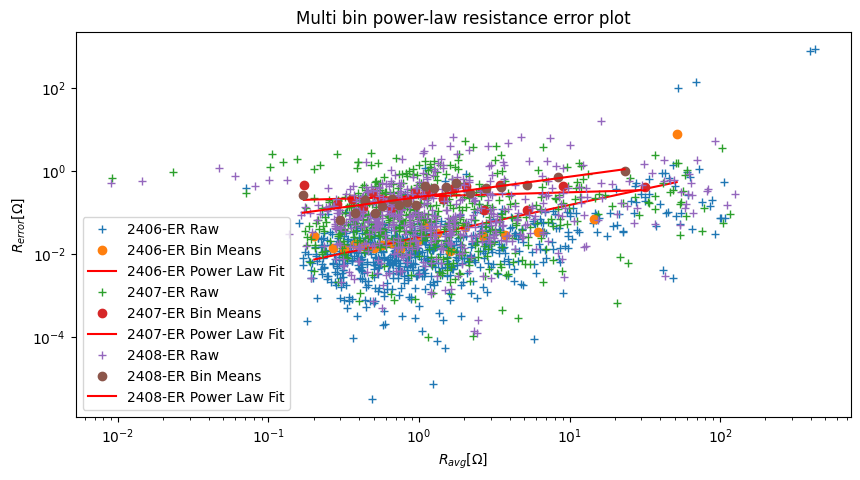

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
k.fitErrorPwl(index=erm,ax=ax)
sfile = np.str_(folder + '1-errormodel' + fadd + '.png')
plt.savefig(sfile, dpi=200)

k.invert(parallel=ipar,modErr=iErr)#, modelDOI=iDOI)

> Plot
- Resistivity
- Resolution matrix
- Difference

ERROR: No sensitivity attribute found
ERROR: No sensitivity attribute found
ERROR: No sensitivity attribute found
ERROR: No sensitivity attribute found


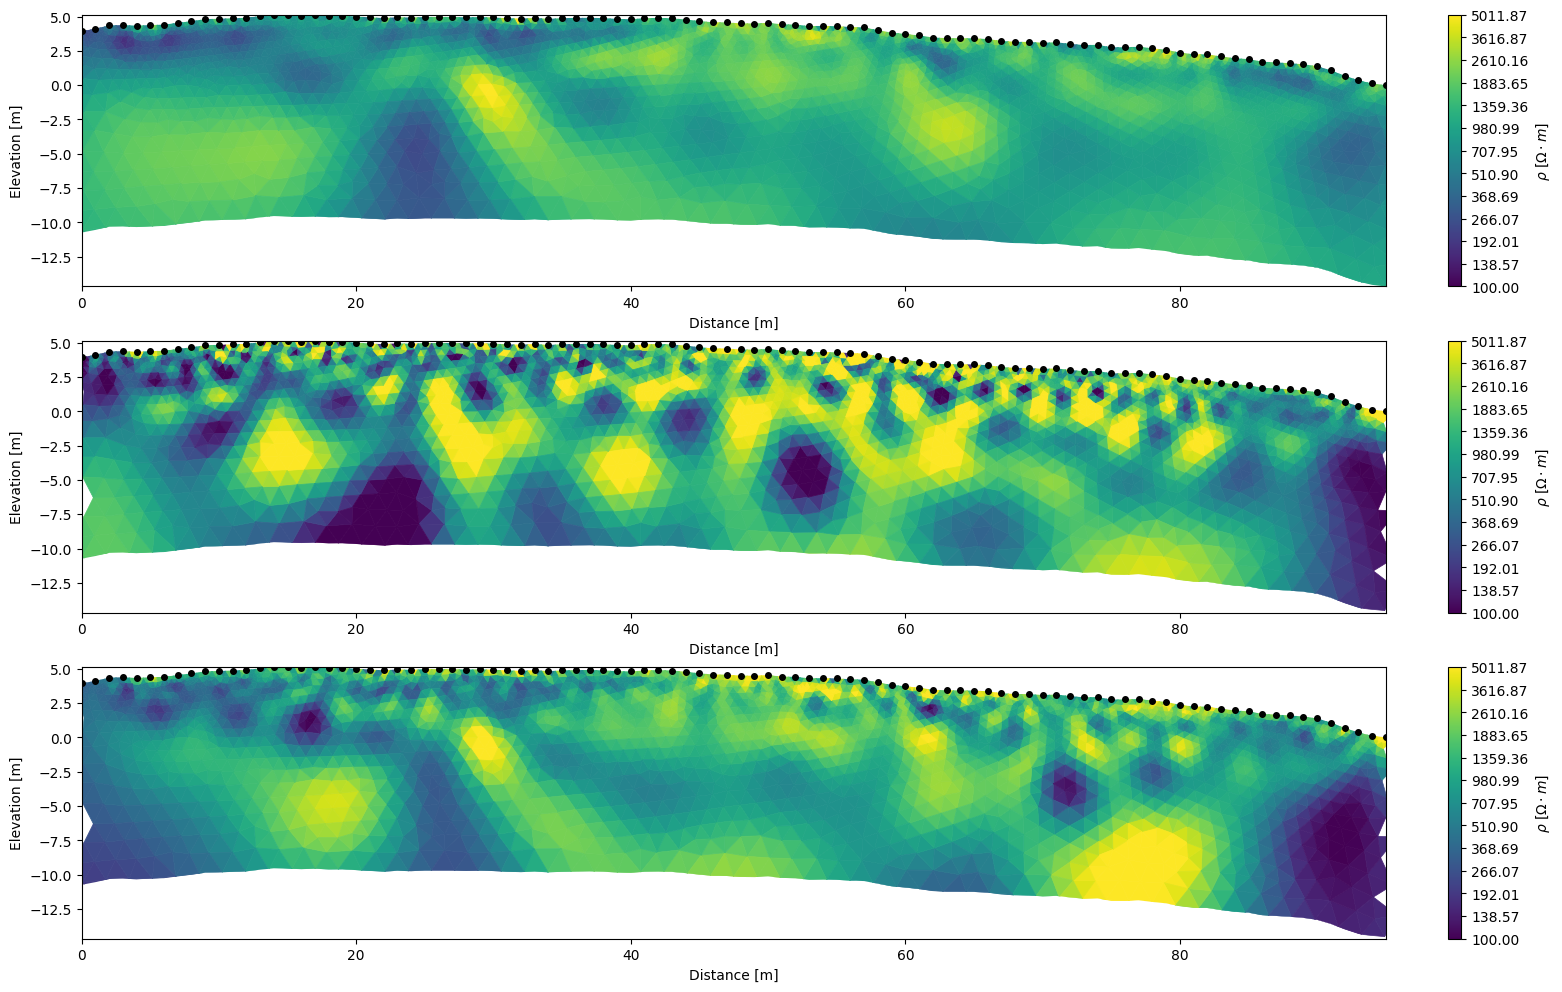

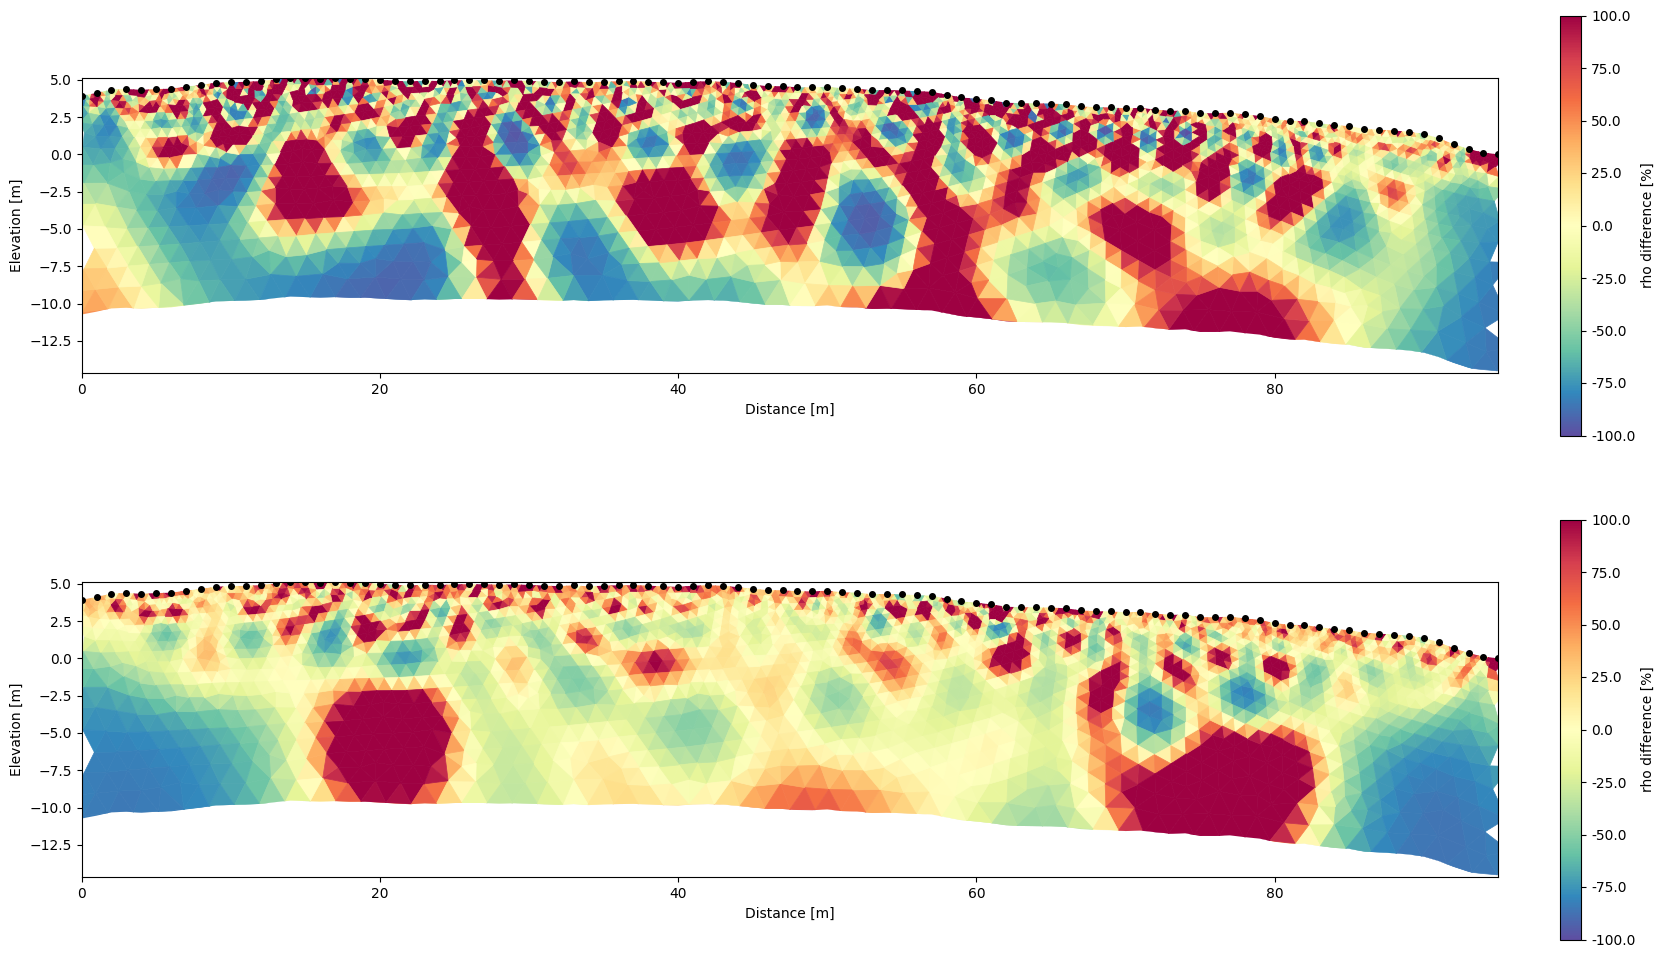

In [24]:
fig, axs = plt.subplots(3,1,figsize=(20,12))
for i, ax in enumerate(axs):
    k.showResults(index=i, ax=ax, edge_color="none", contour=False, sens=True, attr="Resistivity(log10)", 
                color_map="viridis", sensPrc=0.20, doi=False, doiSens=False,
                vmin=2, vmax=3.7,
                clabel=r'$\rho$ [$\Omega \cdot m$]')
sfile = np.str_(folder + '2-Resistivity' + fadd + '.png')
plt.savefig(sfile, dpi=200)

if iResMatrix == 2:
    fig, axs = plt.subplots(2,1,figsize=(20,12))
    k.showResults(index=0, ax=ax, edge_color="none", contour=False, sens=True, attr="Resolution(log10)", 
                    color_map="viridis", sensPrc=0.20, doi=False, doiSens=False,
                    clabel=r'Resolution matrix]')
    sfile = np.str_(folder + '4-Resolution' + fadd + '.png')
    plt.savefig(sfile, dpi=200)


fig, axs = plt.subplots(2,1,figsize=(20,12))
for i, ax in enumerate(axs):
    k.showResults(index=i+1, ax=ax, edge_color="none", contour=False, sens=True, attr="difference(percent)", 
                color_map="Spectral_r", sensPrc=0.20, doi=False, doiSens=False,
                vmin=-100, vmax=100,
                clabel=r'rho difference [%]')
    sfile = np.str_(folder + '3-Difference' + fadd + '.png')
plt.savefig(sfile, dpi=200)